In [15]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os

In [2]:
np.random.seed(1)
    #nois_dist = np.random.
    #axis = np.random.uniform(low,high,(num,3))
print(np.random.uniform(-20000,20000,size=(1,)))
print(np.random.uniform(6000,18000,size =(1,)))
print(np.random.uniform(-10000,10000,size =(1,)))
np.random.uniform(0,4000,size =(12,))

[-3319.1198119]
[14643.89392131]
[-9997.71250365]


array([1209.33029053,  587.02356327,  369.35437908,  745.04084551,
       1382.24290817, 1587.06989692, 2155.26693601, 1676.77805761,
       2740.87800159,  817.80899893, 3512.46974556,  109.55037279])

In [94]:
np.array((1,2,3)).reshape(1,3) -np.zeros((3,3))

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [88]:
np.random.normal(0,dX,(num,))

array([ 0.00315281, -0.00253832, -0.00627945, -0.00219859, -0.00139763,
        0.00682319, -0.00424491, -0.0020083 , -0.00300981, -0.00607778,
        0.0004164 , -0.00062512])

In [23]:
np.random.normal(0,dL,(num,));

In [3]:
8*np.arange(0,7,1) +4;

In [4]:
#print(myint) 正侧
iters =20000
angle = 20
y_axis = 0
z_axis = 10000
x_axis = 0

numGrp = 4*np.arange(1,5,1) #+4#2*np.arange(2,24,2)
#numGrp=[4]
result = []
for num in numGrp:
    calu = np.zeros(3)
    for i in range(iters):
        myint = np.random.randint(0,20000)
        np.random.seed(myint)

        Paxis = np.zeros((num,3))
        Daxis = np.zeros((num,3))

        xyz0 = np.array((x_axis,y_axis,z_axis)).squeeze()

        dX = 0.03*100
        dY = 0.03*100
        dZ = 0.05*100
        dL = 0.02*100  #0.02
        # print(x_axis)
        # print(y_axis)
        # print(z_axis)
        Daxis[:,0] = np.random.normal(0,dX,(num,))
        Daxis[:,1] = np.random.normal(0,dY,(num,))
        Daxis[:,2] = np.random.normal(0,dZ,(num,))
        DL = np.random.normal(0,dL,(num,))
        #print(DL)

        dx0 = z_axis*np.tan(angle*np.pi/180)
        dx1 = dx0 + 1000 #5000 
        #print(dx0, dx1)

        #dz0 = z_axis*np.tan(20*np.pi/180)
        #dz1 =dz0 + 2500
        
        Paxis[:,0] = np.random.uniform(dx0, dx1,size =(num,))
        #print(Paxis)
        Paxis[:,1] = 0 #np.random.uniform(-1500, 1500,size =(num,)) #0
        Paxis[:,2] = 0 #np.random.uniform(0, 0,size =(num,))  
        #Paxis[:num//2+1,0] = -Paxis[:num//2+1,0]
        Paxis[:num//2,0] = -Paxis[:num//2,0]
        
        distL0 = np.sqrt( (x_axis-Paxis[:,0])**2 + (y_axis-Paxis[:,1])**2+ (z_axis-Paxis[:,2])**2 )
        #print(distL0)
        distL1 = distL0 + DL
        distL1 = distL1.reshape(num,1)
        #print(distL1)
        ##########################
        #print(Paxis)
        Paxis += Daxis
        #print(Paxis)
        results = []


        def f5(x):
            m = np.array((x[0],x[1],x[2]),dtype = np.float64).reshape(1,3)
            minus = (m - Paxis)
        #    print('###################')
        #    print(Paxis)
        #    print('#####################')
            k = np.concatenate((minus**2, -distL1**2),axis = 1)
            l = np.sum(k,keepdims = True,axis =1).reshape(-1,1)
            return np.sum(l * minus,axis = 0)

        #Sxyz_tmp = root(f5,[x_axis,y_axis,z_axis])

        Sxyz = fsolve(f5,[x_axis,y_axis,z_axis])

        #D1xyz = Sxyz_tmp.x -xyz0
        Dxyz = (Sxyz - xyz0)**2
        calu += Dxyz
        #print(xyz0)
        #print(Sxyz)
    calu /= iters
    #print(np.concatenate((np.array((num,)),np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))))
    result.append(num)
    result += np.sqrt(calu).tolist()
    result.append(np.sqrt(np.sum(calu)))
    result.append(np.sqrt(np.sum(calu[0:2])))
    print(num, np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))
        #print(D1xyz)

4 [8.60313976 4.06179954 2.82596356] 9.924630940063436 9.513791529699938
8 [4.79135136 7.80404596 2.02323567] 9.378361463371865 9.157520470077603
12 [ 4.15107392 12.92085584  1.70861166] 13.678424037668927 13.571290666402302
16 [ 3.0882686  12.18797322  1.14256325] 12.624957222267682 12.573149727790131


In [18]:
def ToExcel(result,file_path):
    mode = 'a' if os.path.exists(file_path) else 'w'
    writer = pd.ExcelWriter(file_path,mode=mode)
    result.to_excel(writer, index=False,encoding='utf-8',sheet_name='Sheet')
    writer.save()
result = pd.DataFrame(np.array(result).reshape(-1,6),columns=['NUM','σ_X','σ_Y','σ_Z','σ_R','σ_XY'],)
file_path = 'C://Users//gao//Desktop//1.xlsx'

In [22]:
ToExcel(result,file_path)

In [60]:
######################前左+后右##################
iters =20000
angle = 40
y_axis = 0
z_axis = 10000
x_axis = 0

numGrp = 8*np.arange(0,7,1) +4#2*np.arange(2,24,2)
#numGrp=[4]
result = []
for num in numGrp:
    calu = np.zeros(3)
    for i in range(iters):
        myint = np.random.randint(0,20000)
        np.random.seed(myint)

        Paxis = np.zeros((num,3))
        Daxis = np.zeros((num,3))

        xyz0 = np.array((x_axis,y_axis,z_axis)).squeeze()

        dX = 0.05*100
        dY = 0.05*100
        dZ = 0.05*100
        dL = 0.03*100  #0.02
        # print(x_axis)
        # print(y_axis)
        # print(z_axis)
        Daxis[:,0] = np.random.normal(0,dX,(num,))
        Daxis[:,1] = np.random.normal(0,dY,(num,))
        Daxis[:,2] = np.random.normal(0,dZ,(num,))
        DL = np.random.normal(0,dL,(num,))
        #print(DL)

        dx0 = z_axis*np.tan(angle*np.pi/180)
        dx1 = dx0 + 2500 #2500
        #print(dx0, dx1)

        dz0 = z_axis*np.tan(40*np.pi/180)
        dz1 =dz0 +3000
        
        Paxis[:,0] = np.random.uniform(dx0, dx1,size =(num,))
        #print(Paxis)
        Paxis[:num,1] = -np.random.uniform(dz0, dz1,size =(num,))#np.random.uniform(0, 3000,size =(num,)) 
        #0 #np.random.uniform(dz0, dz1,size =(num//2,))
        Paxis[:,2] = 0 #np.random.uniform(0, 0,size =(num,))  
        #Paxis[:num//2+1,0] = -Paxis[:num//2+1,0]
        Paxis[:num//2,0] = -Paxis[:num//2,0]
        Paxis[:num//2,1] = -Paxis[:num//2,1]
        
        distL0 = np.sqrt( (x_axis-Paxis[:,0])**2 + (y_axis-Paxis[:,1])**2+ (z_axis-Paxis[:,2])**2 )
        #print(distL0)
        distL1 = distL0 + DL
        distL1 = distL1.reshape(num,1)
        #print(distL1)
        ##########################
        #print(Paxis)
        Paxis += Daxis
        #print(Paxis)
        results = []


        def f5(x):
            m = np.array((x[0],x[1],x[2]),dtype = np.float64).reshape(1,3)
            minus = (m - Paxis)
        #    print('###################')
        #    print(Paxis)
        #    print('#####################')
            k = np.concatenate((minus**2, -distL1**2),axis = 1)
            l = np.sum(k,keepdims = True,axis =1).reshape(-1,1)
            return np.sum(l * minus,axis = 0)

        #Sxyz_tmp = root(f5,[x_axis,y_axis,z_axis])

        Sxyz = fsolve(f5,[x_axis,y_axis,z_axis])

        #D1xyz = Sxyz_tmp.x -xyz0
        Dxyz = (Sxyz - xyz0)**2
        calu += Dxyz
        #print(xyz0)
        #print(Sxyz)
    calu /= iters
    #print(np.concatenate((np.array((num,)),np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))))
    result.append(num)
    result += np.sqrt(calu).tolist()
    result.append(np.sqrt(np.sum(calu)))
    result.append(np.sqrt(np.sum(calu[0:2])))
    print(num, np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))
        #print(D1xyz)

4 [130.76304654 127.34952949  10.80689804] 182.8487518277908 182.5291127454484
12 [30.3943958  29.76667092  3.19269208] 42.66224650292494 42.542613859090885
20 [24.3866226  23.56347426  2.48582245] 34.001823394107774 33.910834269495
28 [18.41565761 17.6068813   1.57394607] 25.526770664166186 25.4782007668851
36 [16.85366794 16.41990214  1.77831078] 23.597069705150258 23.529966201296595
44 [16.58783984 15.76916437  1.73032023] 22.952494059209265 22.887179280992925
52 [12.99272254 12.93636705  1.25737055] 18.37774229803184 18.33467837948326


In [61]:
result = pd.DataFrame(np.array(result).reshape(-1,6),columns=['NUM','σ_X','σ_Y','σ_Z','σ_R','σ_XY'],)
file_path = 'C://Users//gao//Desktop//1.xlsx'
writer = pd.ExcelWriter(file_path)
result.to_excel(writer, index=False,encoding='utf-8',sheet_name='Sheet')
writer.save()

In [20]:
###########前后#######
iters =20000
angle = 40
y_axis = 0
z_axis = 10000
x_axis = 0

numGrp = 8*np.arange(0,7,1) +4#2*np.arange(2,24,2)
#numGrp=[4]
result = []
for num in numGrp:
    calu = np.zeros(3)
    for i in range(iters):
        myint = np.random.randint(0,20000)
        np.random.seed(myint)

        Paxis = np.zeros((num,3))
        Daxis = np.zeros((num,3))

        xyz0 = np.array((x_axis,y_axis,z_axis)).squeeze()

        dX = 0.03*100
        dY = 0.03*100
        dZ = 0.05*100
        dL = 0.02*100  #0.02
        # print(x_axis)
        # print(y_axis)
        # print(z_axis)
        Daxis[:,0] = np.random.normal(0,dX,(num,))
        Daxis[:,1] = np.random.normal(0,dY,(num,))
        Daxis[:,2] = np.random.normal(0,dZ,(num,))
        DL = np.random.normal(0,dL,(num,))
        #print(DL)

        dx0 = z_axis*np.tan(angle*np.pi/180)
        dx1 = dx0 + 1000 #2500
        #print(dx0, dx1)

        #dz0 = z_axis*np.tan(40*np.pi/180)
        #dz1 =dz0 +3000
        
        Paxis[:,0] = np.random.uniform(dx0, dx1,size =(num,))
        #print(Paxis)
        Paxis[:,1] = np.random.uniform(-1000, 1000,size =(num,))#np.random.uniform(0, 3000,size =(num,)) 
        #0 #np.random.uniform(dz0, dz1,size =(num//2,))
        Paxis[:,2] = 0 #np.random.uniform(0, 0,size =(num,))  
        #Paxis[:num//2+1,0] = -Paxis[:num//2+1,0]
        Paxis[:num//2,0] = -Paxis[:num//2,0]
        
        distL0 = np.sqrt( (x_axis-Paxis[:,0])**2 + (y_axis-Paxis[:,1])**2+ (z_axis-Paxis[:,2])**2 )
        #print(distL0)
        distL1 = distL0 + DL
        distL1 = distL1.reshape(num,1)
        #print(distL1)
        ##########################
        #print(Paxis)
        Paxis += Daxis
        #print(Paxis)
        results = []


        def f5(x):
            m = np.array((x[0],x[1],x[2]),dtype = np.float64).reshape(1,3)
            minus = (m - Paxis)
        #    print('###################')
        #    print(Paxis)
        #    print('#####################')
            k = np.concatenate((minus**2, -distL1**2),axis = 1)
            l = np.sum(k,keepdims = True,axis =1).reshape(-1,1)
            return np.sum(l * minus,axis = 0)

        #Sxyz_tmp = root(f5,[x_axis,y_axis,z_axis])

        Sxyz = fsolve(f5,[x_axis,y_axis,z_axis])

        #D1xyz = Sxyz_tmp.x -xyz0
        Dxyz = (Sxyz - xyz0)**2
        calu += Dxyz
        #print(xyz0)
        #print(Sxyz)
    calu /= iters
    #print(np.concatenate((np.array((num,)),np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))))
    result.append(num)
    result += np.sqrt(calu).tolist()
    result.append(np.sqrt(np.sum(calu)))
    result.append(np.sqrt(np.sum(calu[0:2])))
    print(num, np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))
        #print(D1xyz)

4 [ 6.44461736 68.07174584  6.76657068] 68.71013136957556 68.37613380451013
12 [ 2.32431934 13.81771189  1.79927873] 14.126890181832973 14.01183864681278
20 [1.5935153  8.26065664 1.52066066] 8.549277626613279 8.412950676392862
28 [2.01600875 2.42179835 1.14460135] 3.3525379604681493 3.151094814125687


KeyboardInterrupt: 

In [18]:
result = pd.DataFrame(np.array(result).reshape(-1,6),columns=['NUM','σ_X','σ_Y','σ_Z','σ_R','σ_XY'],)
file_path = 'C://Users//gao//Desktop//1.xlsx'
writer = pd.ExcelWriter(file_path)
result.to_excel(writer, index=False,encoding='utf-8',sheet_name='Sheet')
writer.save()

In [53]:
###########正侧+前斜#######
iters =20000
angle = 40
y_axis = 0
z_axis = 10000
x_axis = 0

numGrp = 8*np.arange(0,7,1) +4#2*np.arange(2,24,2)
#numGrp=[4]
result = []
for num in numGrp:
    calu = np.zeros(3)
    for i in range(iters):
        myint = np.random.randint(0,20000)
        np.random.seed(myint)

        Paxis = np.zeros((num,3))
        Daxis = np.zeros((num,3))

        xyz0 = np.array((x_axis,y_axis,z_axis)).squeeze()

        dX = 0.05*100
        dY = 0.05*100
        dZ = 0.05*100
        dL = 0.03*100  #0.02
        # print(x_axis)
        # print(y_axis)
        # print(z_axis)
        Daxis[:,0] = np.random.normal(0,dX,(num,))
        Daxis[:,1] = np.random.normal(0,dY,(num,))
        Daxis[:,2] = np.random.normal(0,dZ,(num,))
        DL = np.random.normal(0,dL,(num,))
        #print(DL)

        dx0 = z_axis*np.tan(angle*np.pi/180)
        dx1 = dx0 + 2500 #2500
        #print(dx0, dx1)

        dz0 = z_axis*np.tan(40*np.pi/180)
        dz1 =dz0 +1000
        
        Paxis[:,0] = np.random.uniform(dx0, dx1,size =(num,))
        #print(Paxis)
        Paxis[:num//2,1] = np.random.uniform(dz0, dz1,size =(num//2,))#np.random.uniform(0, 3000,size =(num,)) 
        #0 #np.random.uniform(dz0, dz1,size =(num//2,))
        Paxis[:,2] = 0 #np.random.uniform(0, 0,size =(num,))  
        #Paxis[:num//2+1,0] = -Paxis[:num//2+1,0]
        Paxis[:num//2,0] = -Paxis[:num//2,0]
        
        distL0 = np.sqrt( (x_axis-Paxis[:,0])**2 + (y_axis-Paxis[:,1])**2+ (z_axis-Paxis[:,2])**2 )
        #print(distL0)
        distL1 = distL0 + DL
        distL1 = distL1.reshape(num,1)
        #print(distL1)
        ##########################
        #print(Paxis)
        Paxis += Daxis
        #print(Paxis)
        results = []


        def f5(x):
            m = np.array((x[0],x[1],x[2]),dtype = np.float64).reshape(1,3)
            minus = (m - Paxis)
        #    print('###################')
        #    print(Paxis)
        #    print('#####################')
            k = np.concatenate((minus**2, -distL1**2),axis = 1)
            l = np.sum(k,keepdims = True,axis =1).reshape(-1,1)
            return np.sum(l * minus,axis = 0)

        #Sxyz_tmp = root(f5,[x_axis,y_axis,z_axis])

        Sxyz = fsolve(f5,[x_axis,y_axis,z_axis])

        #D1xyz = Sxyz_tmp.x -xyz0
        Dxyz = (Sxyz - xyz0)**2
        calu += Dxyz
        #print(xyz0)
        #print(Sxyz)
    calu /= iters
    #print(np.concatenate((np.array((num,)),np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))))
    result.append(num)
    result += np.sqrt(calu).tolist()
    result.append(np.sqrt(np.sum(calu)))
    result.append(np.sqrt(np.sum(calu[0:2])))
    print(num, np.sqrt(calu), np.sqrt(np.sum(calu)),np.sqrt(np.sum(calu[0:2])))
        #print(D1xyz)

4 [114.13341029 255.88362549 107.86266575] 300.2286125642999 280.1836275373938
12 [32.89677429 71.76424535 32.12734656] 85.23186649184632 78.9449470743959
20 [30.8008204  67.27915793 30.3384813 ] 79.97248950162435 73.99442971992025
28 [21.88367708 47.01725313 21.02236756] 55.95942594405107 51.860557403279216
36 [15.22178942 33.15575357 15.1751695 ] 39.5131957366685 36.482966821495275
44 [14.44132625 31.2362585  12.90134208] 36.751875826347444 34.413017148562744
52 [14.97093311 32.23092335 14.29347813] 38.304892319074796 35.53816622347996


In [54]:
result = pd.DataFrame(np.array(result).reshape(-1,6),columns=['NUM','σ_X','σ_Y','σ_Z','σ_R','σ_XY'],)
file_path = 'C://Users//gao//Desktop//1.xlsx'
writer = pd.ExcelWriter(file_path)
result.to_excel(writer, index=False,encoding='utf-8',sheet_name='Sheet')
writer.save()

In [149]:
print(f6(Sxyz))
print(f6(xyz0))

(3, 6)
[[-5.05207704e+08]
 [-4.81862312e+08]
 [-4.98217660e+08]]
(3, 6)
[[-5.04770168e+08]
 [-4.81435196e+08]
 [-4.97783200e+08]]


In [119]:
   
    calu += (Sxyz - xyz0)**2
        results.append(np.sqrt(calu))
    results = np.array(results).reshape(-1,3)
    
    range_x1 = np.linspace(1,3*3,17)
    plt.figure(k)
    plt.title("%d" %(num))
    plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')
    print(k,results[5,0],results[5,1],results[5,2])

IndentationError: unexpected indent (<ipython-input-119-d7280cd94844>, line 2)

In [120]:
(3-3**0.5)/(3+3**0.5)

0.26794919243112275

In [71]:
axis

array([[7182.40479878, 3907.26339744, 2922.96107164],
       [7776.16831892, 3907.26339744, 2314.95756424],
       [6858.63023588, 3907.26339744, 3236.07067848],
       [9434.69548527, 3907.26339744,  668.9940166 ],
       [8845.56673495, 3907.26339744, 1248.57987431],
       [8666.13046671, 3907.26339744, 1431.72621587],
       [8125.72088085, 3907.26339744, 1966.98919628],
       [8129.30327613, 3907.26339744, 1960.79295835]])

In [78]:
num = 4
np.random.seed(102)
    #nois_dist = np.random.
    #axis = np.random.uniform(low,high,(num,3))
axis = np.zeros((num,3))
y_axis = np.random.uniform(-20000,20000,size=(1,))
z_axis = np.random.uniform(6000,18000,size =(1,))
x_axis = np.random.uniform(-10000,10000,size =(1,))
   # print(x_axis)
   # print(y_axis)
   # print(z_axis)
axis[:,1] = y_axis
axis[:,2] = np.random.uniform(0,4000,size =(num,))
b = np.abs(z_axis-axis[:,2])
print(b)
axis[:,0] = np.random.uniform(6000,8500,size =(num,))# x_axis + np.abs(z_axis-axis[:,2]) +np.random.uniform(-10,10,(num,))

#np.random.uniform((z_axis-axis[:,2]) /3**0.5,(z_axis-axis[:,2]) * 3**0.5)
#np.random.uniform((x_axis-1,x_axis+1),3)
gt = np.array((x_axis,y_axis,z_axis)).squeeze()
#slope_distance= np.random.randint(10,20,cal).reshape(cal,1)
slope_distance = np.sqrt((x_axis-axis[:,0])**2 + (z_axis-axis[:,2])**2) .reshape(num,1)

[11188.88178083 11796.88528822 10875.77217398 13442.84883587]


In [79]:
axis

array([[6780.36242144, 3907.26339744, 2922.96107164],
       [6894.82888492, 3907.26339744, 2314.95756424],
       [7229.36824768, 3907.26339744, 3236.07067848],
       [7225.49559897, 3907.26339744,  668.9940166 ]])

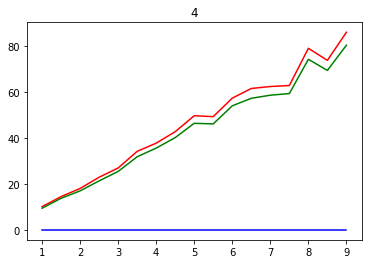

In [80]:
iter = 100
range_x1 = np.linspace(1,9,17)
results = []
for sigma in range_x1:
    calu = np.zeros(3)
    for i in range(iter):
        gussian_noise = np.random.normal(0,sigma,size=(num,1))
        dectected_slope = slope_distance + gussian_noise
        sol4_root = root(f5,[x_axis,y_axis,z_axis])#,method='hybr')
        sol4_fsolve = fsolve(f5,[x_axis,y_axis,z_axis])
        calu += (sol4_fsolve-gt)**2
    calu /= iter
    results.append(np.sqrt(calu))
results = np.array(results).reshape(-1,3)
plt.figure(1)
plt.title("%d" %(num))
plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')

In [81]:
print(range_x1)
print(results)

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9. ]
[[10.11902189  0.          9.42666111]
 [14.49332217  0.         13.7541659 ]
 [18.03956248  0.         16.98406218]
 [22.92453384  0.         21.31950166]
 [26.94352029  0.         25.4359226 ]
 [34.18724255  0.         31.8402409 ]
 [37.75055436  0.         35.59649382]
 [42.73360502  0.         40.15570045]
 [49.67562627  0.         46.38332158]
 [49.29132894  0.         46.12750264]
 [57.32803022  0.         53.99289387]
 [61.53511121  0.         57.26745338]
 [62.3907509   0.         58.61508609]
 [62.82262767  0.         59.31728498]
 [79.01328043  0.         74.22957848]
 [73.78313403  0.         69.40305974]
 [86.00698816  0.         80.36091694]]


In [3]:
cmt = 10
while cmt--:
    print(1)

SyntaxError: invalid syntax (<ipython-input-3-b5958880b1ec>, line 2)

In [21]:
count =100
results=[]
for i in range(10):
    results.append([])
while (count):
    myint = np.random.randint(0,10000)
    #print(myint)
    for k in range (3,13):
        num = k
        np.random.seed(myint)
        #nois_dist = np.random.
        #axis = np.random.uniform(low,high,(num,3))
        axis = np.zeros((num,3))
        y_axis = np.random.uniform(-20000,20000,size=(1,))
        z_axis = np.random.uniform(6000,18000,size =(1,))
        x_axis = np.random.uniform(-10000,10000,size =(1,))
       # print(x_axis)
       # print(y_axis)
       # print(z_axis)
        axis[:,1] = y_axis
        axis[:,2] = np.random.uniform(0,4000,size =(num,))
        axis[:,0] = np.random.uniform(x_axis+10000,x_axis+12500,size =(num,))#np.random.uniform(4000,6500,size =(num,)) #np.random.uniform(6000,8500,size =(num,))
        #np.random.uniform(8000,10500,size =(num,)) #np.random.uniform(-1400,1100,size =(num,))
        #axis[:,0] = x_axis + np.abs(z_axis-axis[:,2]) +np.random.uniform(-10,10,(num,))
        #np.random.uniform((z_axis-axis[:,2]) /3**0.5,(z_axis-axis[:,2]) * 3**0.5)
        #np.random.uniform((x_axis-1,x_axis+1),3)
        gt = np.array((x_axis,y_axis,z_axis)).squeeze()
        #slope_distance= np.random.randint(10,20,cal).reshape(cal,1)
        slope_distance = np.sqrt((x_axis-axis[:,0])**2 + (z_axis-axis[:,2])**2) .reshape(num,1)
        iter = 10
        #range_x1 = np.linspace(1,9,17)
        
        #range_x1:
        calu = np.zeros(3)
        sigma =3.0
        for i in range(iter):
            gussian_noise = np.random.normal(0,sigma,size=(num,1))
            dectected_slope = slope_distance + gussian_noise
            sol4_root = root(f5,[x_axis,y_axis,z_axis])#,method='hybr')
            sol4_fsolve = fsolve(f5,[x_axis,y_axis,z_axis])
            calu += (sol4_fsolve-gt)**2
        calu /= iter
        results[k-3].append(np.sqrt(calu))
    count -= 1
for j in range(10):
    results[j] = np.array(results[j]).reshape(-1,3)
    results[j] = np.mean(results[j],axis = 0)
    print(results[j])
        #plt.figure(k)
        #plt.title("%d" %(num))
        #plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')

[31.48469453  0.39942985 33.33081942]
[22.62979084  0.34973027 23.87993926]
[1.91635543e+01 4.13041537e-06 2.04958750e+01]
[1.56530201e+01 5.49719986e-03 1.65614459e+01]
[1.49855590e+01 1.45022016e-05 1.59310082e+01]
[1.37735743e+01 7.19550627e-04 1.44625340e+01]
[1.23773873e+01 1.34166512e-05 1.32827954e+01]
[11.61100686  0.02121365 12.19345787]
[1.08648467e+01 4.21813874e-05 1.16488048e+01]
[9.86497438e+00 9.89703124e-06 1.05320623e+01]


In [16]:
np.linspace(0,4.5,4)

array([0. , 1.5, 3. , 4.5])

In [16]:
np.random.seed(1)
    #nois_dist = np.random.
    #axis = np.random.uniform(low,high,(num,3))
print(np.random.uniform(-20000,20000,size=(1,)))
print(np.random.uniform(6000,18000,size =(1,)))
print(np.random.uniform(-10000,10000,size =(1,)))
np.random.uniform(0,4000,size =(12,))

[array([ 7.93905316,  0.        , 13.36177116]),
 array([10.56601648,  0.        , 17.66983455]),
 array([ 7.4386378,  0.       , 12.5274809]),
 array([ 9.76486018,  0.        , 16.43237519]),
 array([5.87627917, 0.        , 9.96960922]),
 array([ 6.49009916,  0.        , 11.66786325]),
 array([ 6.88698535,  0.        , 12.12525984]),
 array([ 5.77138035,  0.        , 10.29004604]),
 array([5.42950936, 0.        , 9.94326416]),
 [array([5.29185822, 0.        , 9.19089388])]]

In [9]:
#####画表版
count =100
results=[]
for i in range(4):
    results.append([])
while (count):
    myint = np.random.randint(0,10000)
    #print(myint)
    #for k in range (1,5):
        num = 12
        np.random.seed(myint)
        #nois_dist = np.random.
        #axis = np.random.uniform(low,high,(num,3))
        axis = np.zeros((num,3))
        y_axis = np.random.uniform(-20000,20000,size=(1,)) #+1500*k
        z_axis = np.random.uniform(8000,18000,size =(1,))
        x_axis = np.random.uniform(-10000,10000,size =(1,))
        gt = np.repeat(np.array((x_axis,y_axis,z_axis)).reshape(1,3),4,axis = 0)
        gt[:,1] += np.linspace(0,4.5,4)
        
       # print(x_axis)
       # print(y_axis)
       # print(z_axis)
        axis[:,1] = y_axis
        axis[:,2] = np.random.uniform(0,2000,size =(num,))
        axis[:,0] = np.random.uniform(x_axis+10000,x_axis+12500,size =(num,))#np.random.uniform(4000,6500,size =(num,)) #np.random.uniform(6000,8500,size =(num,))
        #np.random.uniform(8000,10500,size =(num,)) #np.random.uniform(-1400,1100,size =(num,))
        #axis[:,0] = x_axis + np.abs(z_axis-axis[:,2]) +np.random.uniform(-10,10,(num,))
        #np.random.uniform((z_axis-axis[:,2]) /3**0.5,(z_axis-axis[:,2]) * 3**0.5)
        #np.random.uniform((x_axis-1,x_axis+1),3)
        
        #slope_distance= np.random.randint(10,20,cal).reshape(cal,1)
        slope_distance = np.sqrt((x_axis-axis[:,0])**2 + (z_axis-axis[:,2])**2) .reshape(num,1)
        iter = 10
        #range_x1 = np.linspace(1,9,17)
        
        #range_x1:
        calu = np.zeros(3)
        sigma =3.0
        for i in range(iter):
            gussian_noise = np.random.normal(0,sigma,size=(num,1))
            dectected_slope = slope_distance + gussian_noise
            sol4_root = root(f5,[x_axis,y_axis,z_axis])#,method='hybr')
            sol4_fsolve = fsolve(f5,[x_axis,y_axis,z_axis])
            calu += (sol4_fsolve-gt)**2
        calu /= iter
        results[k-1].append(np.sqrt(calu))
    count -= 1
for j in range(4):
    results[j] = np.array(results[j]).reshape(-1,3)
    results[j] = np.mean(results[j],axis = 0)
    print(results[j])
        #plt.figure(k)
        #plt.title("%d" %(num))
        #plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')

[50.18070507  1.48067788 55.46994469]
[50.18070507  1.48067788 55.46994469]
[50.18070507  1.48067788 55.46994469]
[50.18070507  1.48067788 55.46994469]


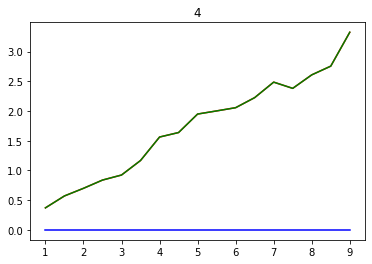

In [31]:
iter = 100
range_x1 = np.linspace(1,9,17)
results = []
for sigma in range_x1:
    calu = np.zeros(3)
    for i in range(iter):
        gussian_noise = np.random.normal(0,sigma,size=(num,1))
        dectected_slope = slope_distance + gussian_noise
        sol4_root = root(f5,[x_axis,y_axis,z_axis])#,method='hybr')
        sol4_fsolve = fsolve(f5,[x_axis,y_axis,z_axis])
        calu += (sol4_fsolve-gt)**2
    calu /= iter
    results.append(np.sqrt(calu))
results = np.array(results).reshape(-1,3)
plt.figure(1)
plt.title("%d" %(num))
plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')

In [40]:
results

array([[0.37084577, 0.        , 0.37081952],
       [0.57119398, 0.        , 0.57118943],
       [0.69938651, 0.        , 0.69937278],
       [0.83812614, 0.        , 0.83817531],
       [0.92297803, 0.        , 0.92299833],
       [1.16716537, 0.        , 1.16715084],
       [1.56187693, 0.        , 1.5618744 ],
       [1.63753286, 0.        , 1.63752307],
       [1.94840809, 0.        , 1.948404  ],
       [2.0011161 , 0.        , 2.001074  ],
       [2.05537186, 0.        , 2.05535391],
       [2.2244824 , 0.        , 2.22448162],
       [2.48512145, 0.        , 2.48514157],
       [2.38039182, 0.        , 2.38040223],
       [2.60731285, 0.        , 2.60730693],
       [2.75396487, 0.        , 2.75398378],
       [3.32399209, 0.        , 3.32399482]])

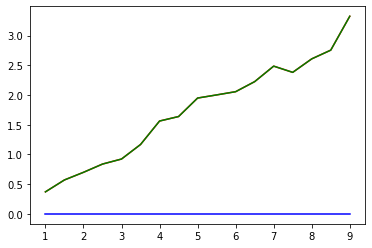

In [39]:
iter = 100
range_x1 = np.linspace(1,9,17)
results = []
for sigma in range_x1:
    calu = np.zeros(3)
    for i in range(iter):
        gussian_noise = np.random.normal(0,sigma,size=(num,1))
        dectected_slope = slope_distance + gussian_noise
        sol4_root = root(f5,[x_axis,y_axis,z_axis])#,method='hybr')
        sol4_fsolve = fsolve(f5,[x_axis,y_axis,z_axis])
        calu += (sol4_fsolve-gt)**2
    calu /= iter
    results.append(np.sqrt(calu))
results = np.array(results).reshape(-1,3)
plt.figure(1)
plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')

In [22]:
results ####4

array([[0.29770537, 0.        , 0.29769793],
       [0.48703619, 0.        , 0.48701882],
       [0.56746498, 0.        , 0.56749738],
       [0.74591266, 0.        , 0.7459098 ],
       [0.8295017 , 0.        , 0.82950123],
       [1.12314019, 0.        , 1.12313439],
       [1.1011735 , 0.        , 1.10113306],
       [1.28848294, 0.        , 1.28847998],
       [1.40248342, 0.        , 1.40251827],
       [1.57523363, 0.        , 1.57522752],
       [1.58804903, 0.        , 1.58805666],
       [2.06828277, 0.        , 2.06830618],
       [2.02486808, 0.        , 2.02487966],
       [2.1310495 , 0.        , 2.13105431],
       [2.17160721, 0.        , 2.17159802],
       [2.38031159, 0.        , 2.38032129],
       [2.6754533 , 0.        , 2.67547813]])

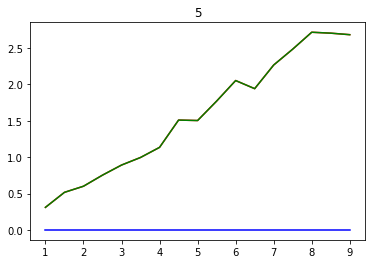

In [35]:
iter = 100
range_x1 = np.linspace(1,9,17)
results = []
for sigma in range_x1:
    calu = np.zeros(3)
    for i in range(iter):
        gussian_noise = np.random.normal(0,sigma,size=(num,1))
        dectected_slope = slope_distance + gussian_noise
        sol4_root = root(f5,[x_axis,y_axis,z_axis])#,method='hybr')
        sol4_fsolve = fsolve(f5,[x_axis,y_axis,z_axis])
        calu += (sol4_fsolve-gt)**2
    calu /= iter
    results.append(np.sqrt(calu))
results = np.array(results).reshape(-1,3)
plt.figure(1)
plt.title("%d" %(num))
plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')

In [36]:
results

array([[0.30990996, 0.        , 0.30991397],
       [0.51641654, 0.        , 0.51641679],
       [0.60039239, 0.        , 0.60042056],
       [0.75299696, 0.        , 0.75300848],
       [0.8915473 , 0.        , 0.89153156],
       [0.99579858, 0.        , 0.9957915 ],
       [1.13481181, 0.        , 1.13478367],
       [1.50994607, 0.        , 1.50992315],
       [1.50365299, 0.        , 1.50364546],
       [1.77070908, 0.        , 1.77070847],
       [2.05323799, 0.        , 2.05327385],
       [1.94164791, 0.        , 1.94165919],
       [2.26691584, 0.        , 2.26691862],
       [2.48499527, 0.        , 2.48498591],
       [2.71726379, 0.        , 2.71727408],
       [2.70465684, 0.        , 2.70467874],
       [2.68369105, 0.        , 2.68367369]])

In [ ]:
iter = 100
range_x1 = np.linspace(1,9,17)
results = []
for sigma in range_x1:
    calu = np.zeros(3)
    for i in range(iter):
        gussian_noise = np.random.normal(0,sigma,size=(num,1))
        dectected_slope = slope_distance + gussian_noise
        sol4_root = root(f5,[x_axis,y_axis,z_axis])#,method='hybr')
        sol4_fsolve = fsolve(f5,[x_axis,y_axis,z_axis])
        calu += (sol4_fsolve-gt)**2
    calu /= iter
    results.append(np.sqrt(calu))
results = np.array(results).reshape(-1,3)
plt.figure(1)
plt.title("%d" %(num))
plt.plot(range_x1,results[:,0],'r',range_x1,results[:,1],'b',range_x1,results[:,2],'g')

In [62]:
def f5(x):
    m = np.array((x[0],x[1],x[2]),dtype = np.float64).reshape(1,3)
    minus = (m - Paxis)
    k = np.concatenate((minus**2, -distL1**2),axis = 1)
    l = np.sum(k,keepdims = True,axis =1).reshape(-1,1)
    return np.sum(l * minus,axis = 0)

In [77]:
Paxis = np.array((0,0,1,0,0,-1,1,0,0,-1,0,0)).reshape(4,3)
distL1 = np.array((1,1,1,1)).reshape(4,1)
sol4_root = root(f5,[233,323,233])#,method='hybr')
sol4_fsolve = fsolve(f5,[233,323,233])

In [78]:
sol4_fsolve

array([-3.63750972e-17,  0.00000000e+00, -3.47370894e-27])